<a href="https://colab.research.google.com/github/ahincho/robot-trading-challenge/blob/main/Robot-Trading-Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Robot Trading Challenge**

**a. Descripción:** El Challenge Robot Trading consiste en crear un Robot de Trading en Python para tomar decisiones de compra y venta de Bitcoin en tiempo real. El proyecto consta de los siguientes puntos que expondré a continuación.

**b. Configuración del Ambiente:** Configurar el entorno de desarrollo con Python 3.x y librerías clave.

**c. Obtención de Datos:** Obtener datos de precios históricos de Bitcoin a través de una API y datos actuales mediante Web Scraping.

**d. Limpieza de Datos:** Limpiar datos, eliminando outliers, valores nulos y duplicados, y calcular el precio promedio.

**e. Toma de Decisiones:** Tomar decisiones de compra/venta en tiempo real basadas en la comparación del precio actual y la tendencia.

**f. Visualización de Datos:** Visualizar datos utilizando Matplotlib para mostrar la evolución de los precios y las decisiones de trading.

**g. Automatización:** Automatizar el proceso de toma de decisiones y actualización de gráficos, ejecutándolo cada 5 minutos.


In [457]:
from IPython.display import Image

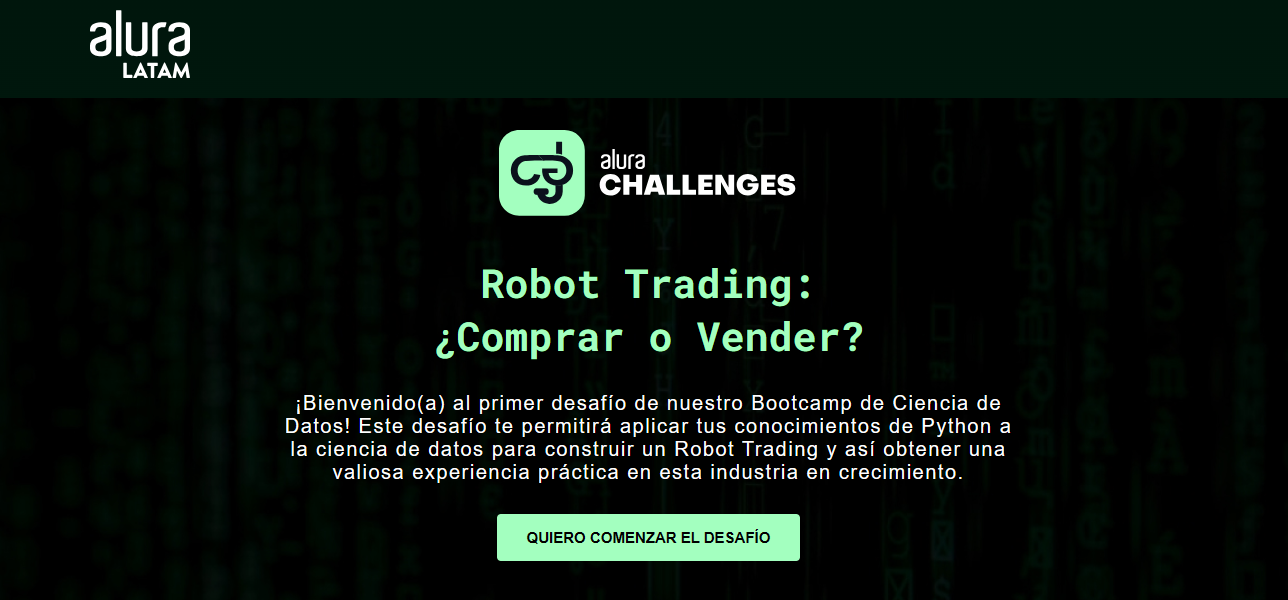

In [458]:
image_url = '/content/Enunciado.png'
Image(image_url)

## **1. Configuración del Ambiente**

In [459]:
# Version de Python
!python --version

Python 3.10.12


In [460]:
# Instalar Numpy
!python -m pip install numpy

In [461]:
# Instalar Pandas
!python -m pip install pandas

In [462]:
# Instalar Matplotlib
!python -m pip install matplotlib

In [463]:
# Importar las librerias
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize = (15, 10))

In [464]:
# Verificar las versiones
print(f'Numpy : {np.__version__}')
print(f'Pandas : {pd.__version__}')
print(f'Matplotlib : {matplotlib.__version__}')

Numpy : 1.23.5
Pandas : 1.5.3
Matplotlib : 3.7.1


In [465]:
# Variables globales
global df_bitcoin, current_bitcoin_price, trend, mean_bitcoin_price, decision_algorithm

## **2. Obtención de los Datos**

### **a. Información del Bitcoin con Yahoo Finance**

In [466]:
# Instalar la libreria Yahoo Finance : https://pypi.org/project/yfinance/
!pip3 install yfinance

In [467]:
# Importar la libreria de Yahoo Finance
import yfinance as yf

In [468]:
# Recuperar los datos historicos de la ultima semana en intervalos de 5m
def import_financial_database(ticker, interval, start, end):
  data = yf.Ticker(ticker)
  history = data.history(interval = interval, start = start, end = end)
  return history

In [469]:
# Debemos importar la libreria Datetime para trabajar con fechas
import datetime
# Definimos el activo que vamos a recuperar y el periodo
bitcoin_ticker = 'BTC-USD'
interval = '5m'
today = datetime.date.today()
start = (today - datetime.timedelta(days = 7)).strftime('%Y-%m-%d')
end = (today + datetime.timedelta(days = 1)).strftime('%Y-%m-%d')

In [470]:
# Revisando los datos o argumentos a utilizar
print(f'Ticker : {bitcoin_ticker}')
print(f'Interval : {interval}')
print(f'Start Date : {start}')
print(f'End Date : {end}')

Ticker : BTC-USD
Interval : 5m
Start Date : 2023-11-03
End Date : 2023-11-11


In [471]:
# Recuperamos la informacion del Bitcoin usando 'yfinance'
df_bitcoin = import_financial_database(bitcoin_ticker, interval, start, end)

In [472]:
# Revisamos el tipo de dato que devuelve Ticker e History
type(df_bitcoin)

pandas.core.frame.DataFrame

In [473]:
# Devuelve un Dataframe, vamos revisar algunas filas
df_bitcoin.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-03 00:00:00+00:00,34942.472656,34942.472656,34883.429688,34883.429688,0,0.0,0.0
2023-11-03 00:05:00+00:00,34866.761719,34883.429688,34852.617188,34870.574219,0,0.0,0.0
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0,0.0,0.0
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0,0.0,0.0
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0,0.0,0.0
2023-11-03 00:25:00+00:00,34833.437500,34833.437500,34801.046875,34803.000000,0,0.0,0.0
2023-11-03 00:30:00+00:00,34789.164062,34789.164062,34770.187500,34770.187500,0,0.0,0.0
2023-11-03 00:35:00+00:00,34753.316406,34753.316406,34665.085938,34665.085938,11558912,0.0,0.0
2023-11-03 00:40:00+00:00,34713.839844,34731.152344,34713.839844,34731.152344,2750464,0.0,0.0


In [474]:
# Revisamos los ultimos registros
df_bitcoin.sort_values(by = 'Datetime', ascending = False)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-10 05:10:00+00:00,36722.558594,36722.558594,36722.558594,36722.558594,0,0.0,0.0
2023-11-10 05:05:00+00:00,36754.566406,36772.710938,36724.710938,36748.375000,7622656,0.0,0.0
2023-11-10 05:00:00+00:00,36787.765625,36788.308594,36741.566406,36760.531250,0,0.0,0.0
2023-11-10 04:55:00+00:00,36752.914062,36794.953125,36752.914062,36785.109375,35647488,0.0,0.0
2023-11-10 04:50:00+00:00,36715.964844,36758.878906,36715.964844,36758.878906,5558272,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0,0.0,0.0
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0,0.0,0.0
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0,0.0,0.0


In [475]:
# Reorganizar el dataframe para tener a la mano los ultimos registros
df_bitcoin = df_bitcoin.sort_values(by = 'Datetime', ascending = False)

In [476]:
# Revisar los primeros registros del Dataframe
df_bitcoin.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-10 05:10:00+00:00,36722.558594,36722.558594,36722.558594,36722.558594,0,0.0,0.0
2023-11-10 05:05:00+00:00,36754.566406,36772.710938,36724.710938,36748.375000,7622656,0.0,0.0
2023-11-10 05:00:00+00:00,36787.765625,36788.308594,36741.566406,36760.531250,0,0.0,0.0
2023-11-10 04:55:00+00:00,36752.914062,36794.953125,36752.914062,36785.109375,35647488,0.0,0.0
2023-11-10 04:50:00+00:00,36715.964844,36758.878906,36715.964844,36758.878906,5558272,0.0,0.0


### **b. Análisis de la Información de Yahoo Finance**

In [477]:
# Es un Dataframe de Pandas, usamos todas las operaciones comunes
# No tenemos ningun registro nulo de momento
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1979 entries, 2023-11-10 05:10:00+00:00 to 2023-11-03 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1979 non-null   float64
 1   High          1979 non-null   float64
 2   Low           1979 non-null   float64
 3   Close         1979 non-null   float64
 4   Volume        1979 non-null   int64  
 5   Dividends     1979 non-null   float64
 6   Stock Splits  1979 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 123.7 KB


In [478]:
# Estadistica Descriptiva
# Para que la API de Yahoo Finance ya no expone 'Dividends' ni 'Splits
# El Bitcoin en todos sus precios varia entre un 1% y 2%
df_bitcoin.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1979.000000,1979.000000,1979.000000,1979.000000,1.979000e+03,1979.0,1979.0
mean,35284.665835,35301.115701,35268.790010,35285.491781,2.358429e+07,0.0,0.0
std,694.540291,701.476703,687.361719,694.653716,5.937806e+07,0.0,0.0
min,34154.750000,34154.750000,34154.750000,34154.750000,0.000000e+00,0.0,0.0
25%,34807.220703,34817.515625,34797.632812,34808.900391,0.000000e+00,0.0,0.0
50%,35065.535156,35081.539062,35054.375000,35067.027344,2.478080e+06,0.0,0.0
75%,35394.617188,35408.394531,35381.025391,35394.056641,2.186394e+07,0.0,0.0
max,37904.132812,37926.257812,37810.367188,37926.257812,8.399258e+08,0.0,0.0


In [479]:
# Podemos desechar las columnas 'dividends' y 'stock splits'
df_bitcoin.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [480]:
# Observamos nuestro Dataframe despues de dropear las columnas
df_bitcoin.head(10)

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-10 05:10:00+00:00,36722.558594,36722.558594,36722.558594,36722.558594,0
2023-11-10 05:05:00+00:00,36754.566406,36772.710938,36724.710938,36748.375000,7622656
2023-11-10 05:00:00+00:00,36787.765625,36788.308594,36741.566406,36760.531250,0
2023-11-10 04:55:00+00:00,36752.914062,36794.953125,36752.914062,36785.109375,35647488
2023-11-10 04:50:00+00:00,36715.964844,36758.878906,36715.964844,36758.878906,5558272
2023-11-10 04:45:00+00:00,36703.054688,36711.050781,36660.519531,36711.050781,8830976
2023-11-10 04:40:00+00:00,36775.781250,36775.781250,36710.214844,36710.214844,0
2023-11-10 04:35:00+00:00,36752.546875,36779.722656,36752.546875,36763.152344,0
2023-11-10 04:30:00+00:00,36718.250000,36754.574219,36718.250000,36754.574219,0


In [481]:
# Seria bueno redefinir la funcion para evitar los datos nulos o vacios
# Recuperar los datos historicos de la ultima semana en intervalos de 5m
def import_financial_database(ticker, interval, start, end):
  data = yf.Ticker(ticker)
  history = data.history(interval = interval, start = start, end = end)
  history.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)
  return history

In [482]:
# Definimos el activo que vamos a recuperar y el periodo
bitcoin_ticker = 'BTC-USD'
interval = '5m'
today = datetime.date.today()
start = (today - datetime.timedelta(days = 7)).strftime('%Y-%m-%d')
end = (today + datetime.timedelta(days = 1)).strftime('%Y-%m-%d')

In [483]:
# Importamos nuevamente nuestro historico del Bitcoin
df_bitcoin = import_financial_database(bitcoin_ticker, interval, start, end)

In [484]:
# Revision y estadistica descriptiva
df_bitcoin.describe()

,Open,High,Low,Close,Volume
count,1979.000000,1979.000000,1979.000000,1979.000000,1.979000e+03
mean,35284.665835,35301.115701,35268.790010,35285.491781,2.358429e+07
std,694.540291,701.476703,687.361719,694.653716,5.937806e+07
min,34154.750000,34154.750000,34154.750000,34154.750000,0.000000e+00
25%,34807.220703,34817.515625,34797.632812,34808.900391,0.000000e+00
50%,35065.535156,35081.539062,35054.375000,35067.027344,2.478080e+06
75%,35394.617188,35408.394531,35381.025391,35394.056641,2.186394e+07
max,37904.132812,37926.257812,37810.367188,37926.257812,8.399258e+08


<Axes: >

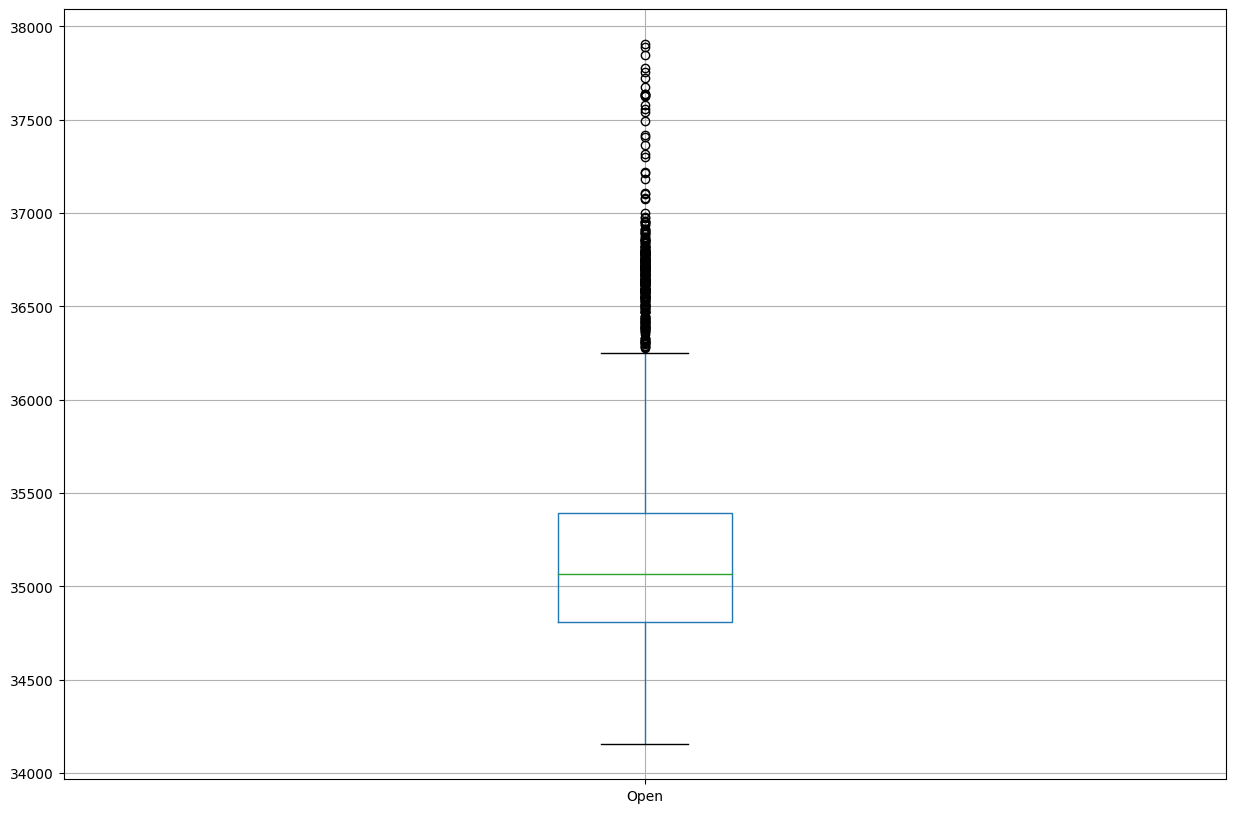

In [485]:
# Grafico de Caja para la variable Open
# Como vemos hay mucho ruido en los valores, tal vez por la volatilidad
df_bitcoin.boxplot('Open')

<Axes: >

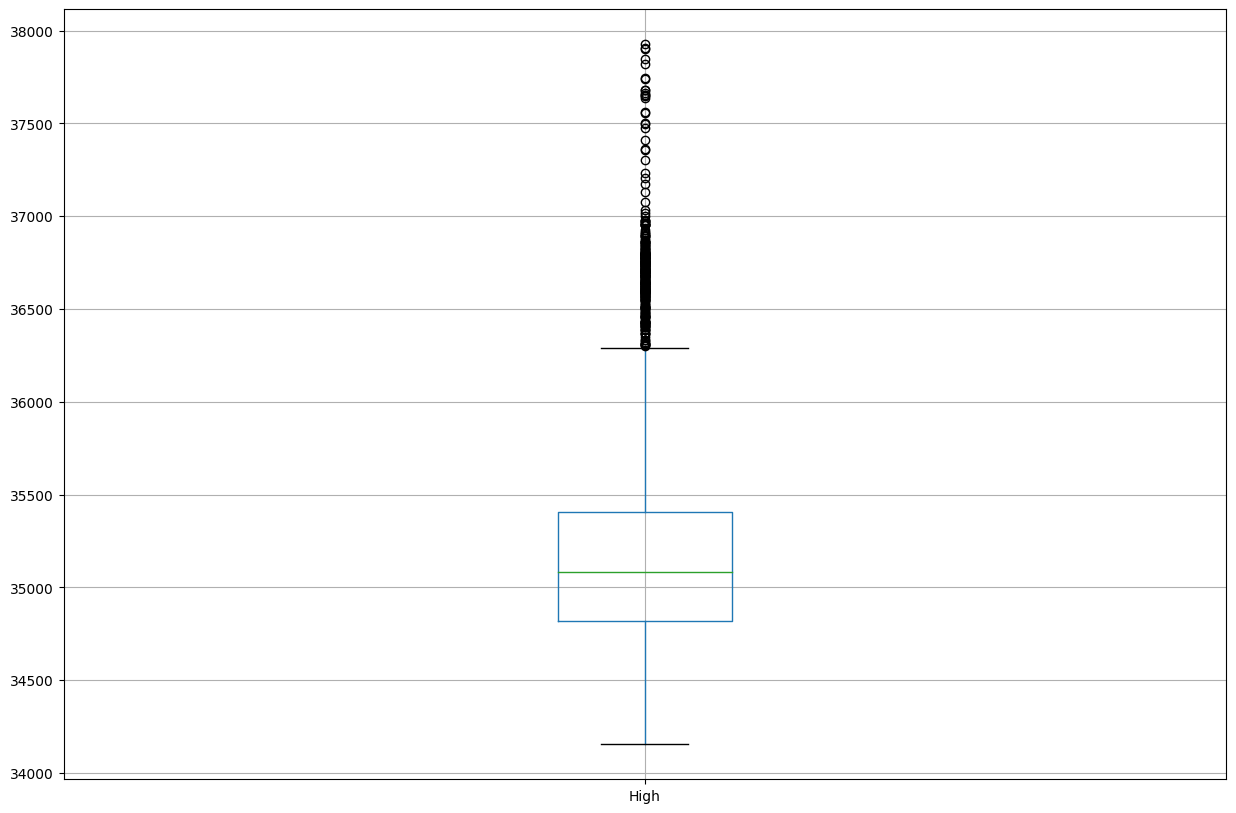

In [486]:
# Grafico de Caja para la variable High
# Aqui tambien existe mucho ruido y outliers
df_bitcoin.boxplot('High')

<Axes: >

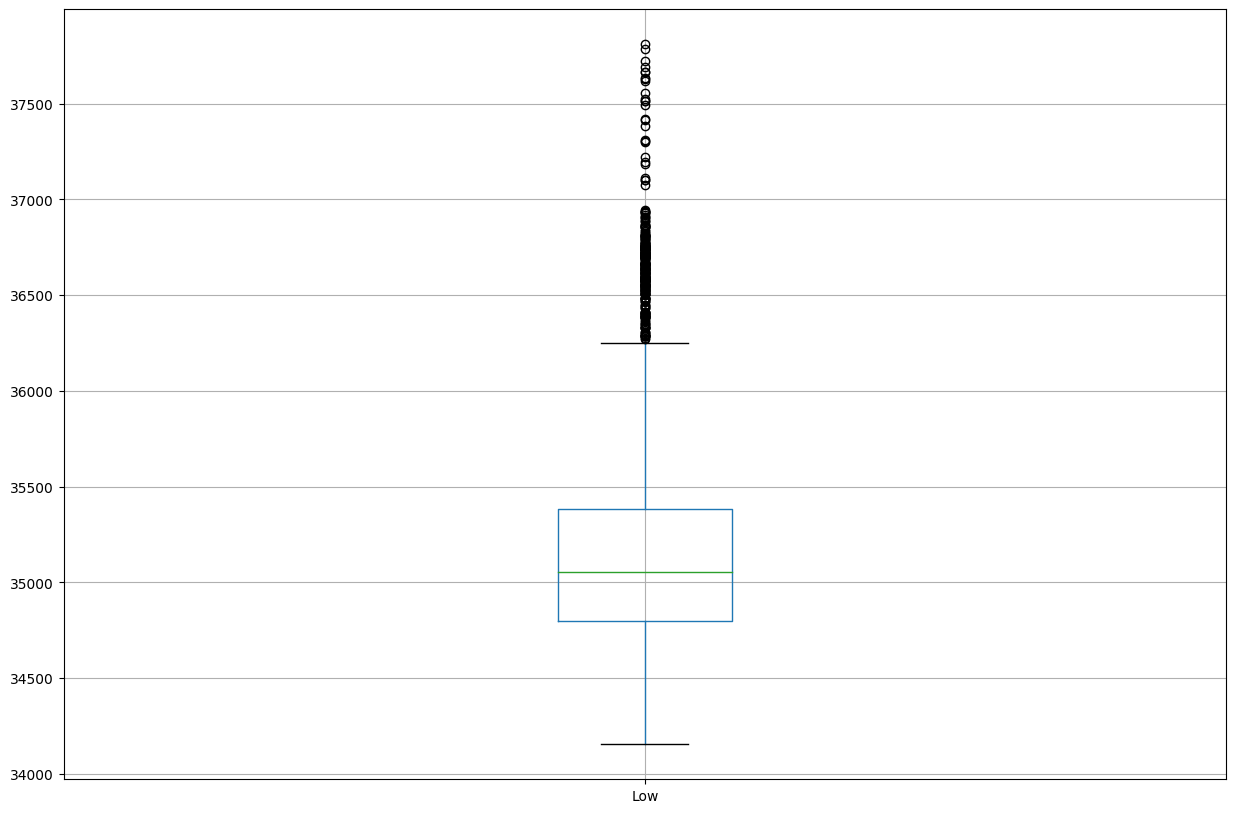

In [487]:
# Grafico de Caja para la variable Low
df_bitcoin.boxplot('Low')

<Axes: >

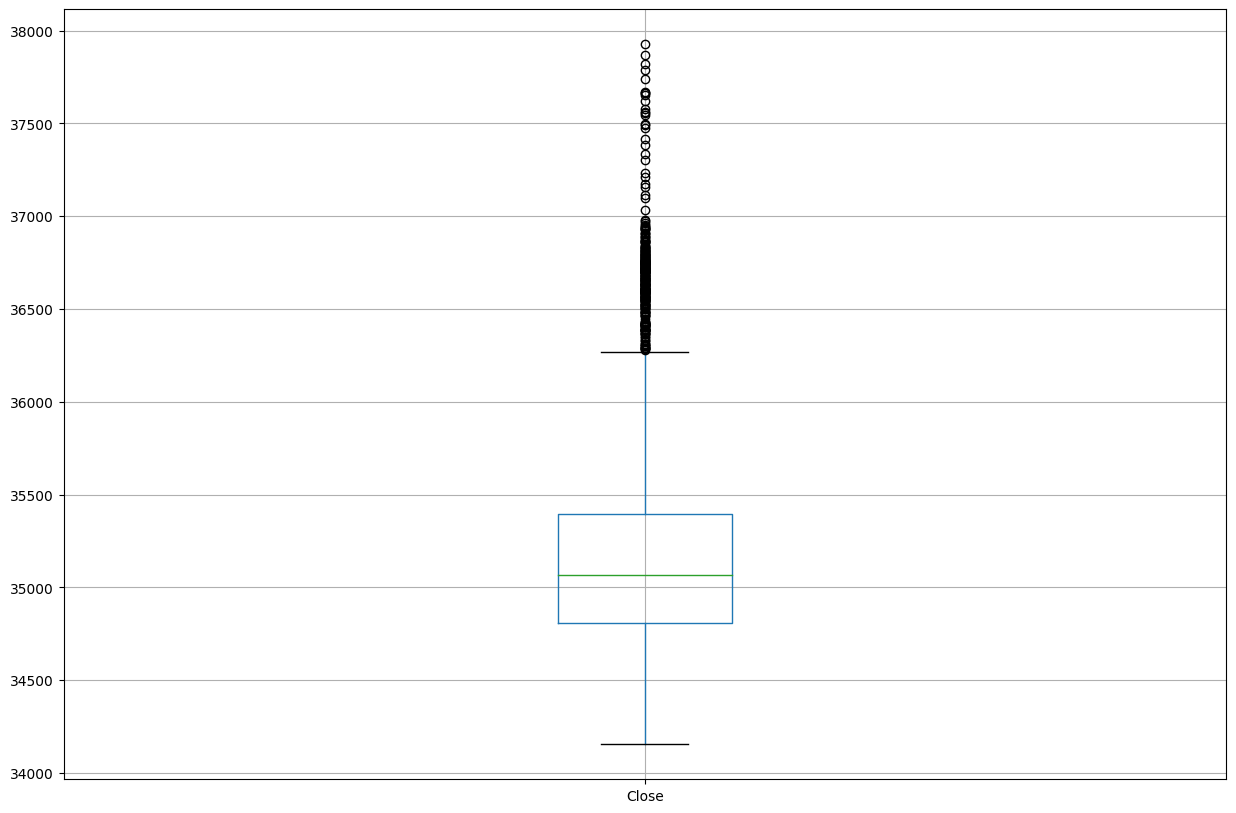

In [488]:
# Grafico de Caja para la variable Close
df_bitcoin.boxplot('Close')

<Axes: >

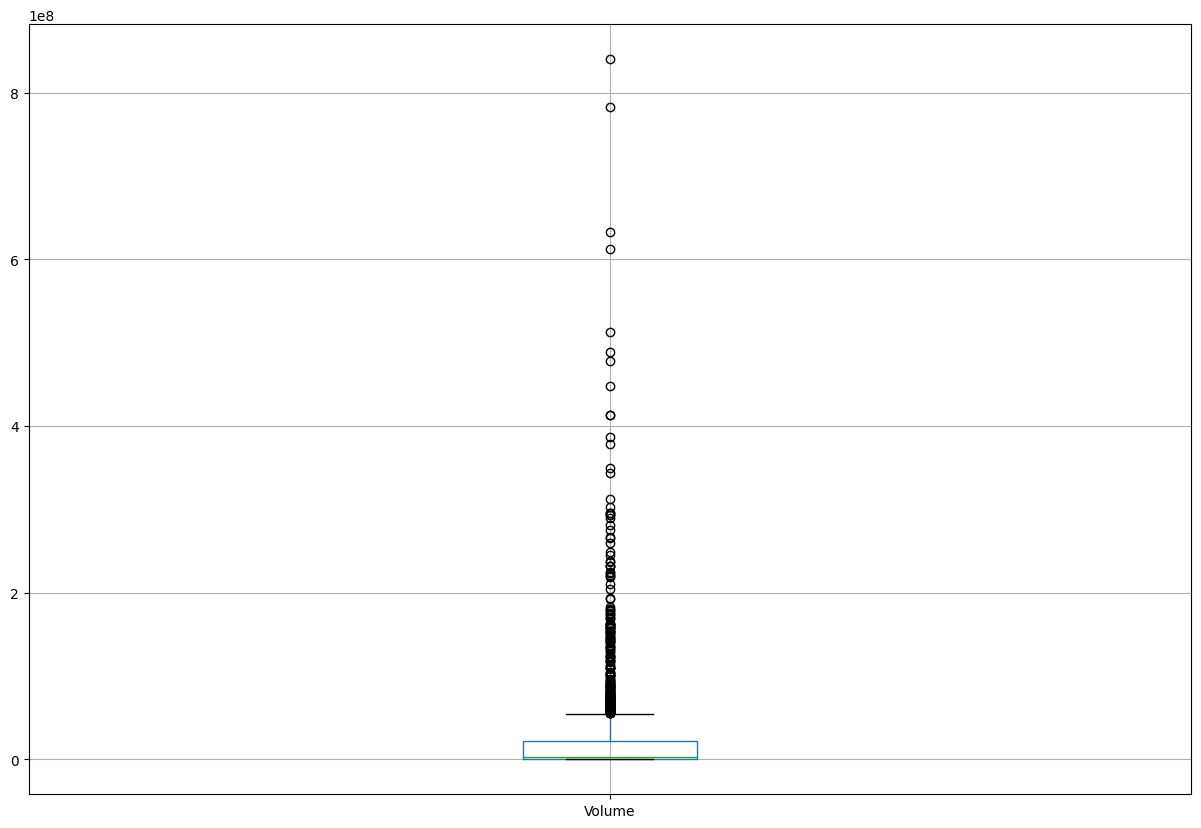

In [489]:
# Grafico de Caja para la variable Volume
df_bitcoin.boxplot('Volume')

In [490]:
# Tenemos las siguientes variables en nuestro Dataframe
list(df_bitcoin.columns)

['Open', 'High', 'Low', 'Close', 'Volume']

In [491]:
# Reutilizamos la funcion anterior en la funcion 'import_bitcoin_database'
def import_bitcoin_database():
  today = datetime.date.today()
  start = (today - datetime.timedelta(days = 7)).strftime('%Y-%m-%d')
  end = (today + datetime.timedelta(days = 1)).strftime('%Y-%m-%d')
  bitcoin_history = import_financial_database('BTC-USD', '5m', start, end)
  return bitcoin_history

In [492]:
# Asignamos finalmente el valor para la variable 'df_bitcoin'
df_bitcoin = import_bitcoin_database()
df_bitcoin.head(10)

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-03 00:00:00+00:00,34942.472656,34942.472656,34883.429688,34883.429688,0
2023-11-03 00:05:00+00:00,34866.761719,34883.429688,34852.617188,34870.574219,0
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0
2023-11-03 00:25:00+00:00,34833.437500,34833.437500,34801.046875,34803.000000,0
2023-11-03 00:30:00+00:00,34789.164062,34789.164062,34770.187500,34770.187500,0
2023-11-03 00:35:00+00:00,34753.316406,34753.316406,34665.085938,34665.085938,11558912
2023-11-03 00:40:00+00:00,34713.839844,34731.152344,34713.839844,34731.152344,2750464


### **c. Obtener las Tendencias usando Web Scraping**

In [493]:
# Para ello vamos a utilizar la siguiente pagina web
coin_market_url = 'https://coinmarketcap.com/'

In [494]:
# Vamos a empezar con nuestro Web Scraping
# Importamos las librerias de Request y Beautiful Soup
import requests
from bs4 import BeautifulSoup

In [495]:
# Recuperamos el contenido del endpoint para el Bitcoin
response = requests.get(coin_market_url)

In [496]:
# Verificamos que la respuesta haya sido exitosa
print(response)

<Response [200]>


In [497]:
# Parseamos el contenido a un objeto de Beautiful Soup
html = response.text
soup = BeautifulSoup(html, 'html.parser')

In [498]:
# Vamos a buscar la celda en la table que contiene la informacion del bitcoin
bitcoin_row = soup.find('a', {'href': "/currencies/bitcoin/#markets"})

In [499]:
# Ahora recuperaremos el precio actual del bitcoin
bitcoin_current_price = bitcoin_row.find('span').get_text(strip = True)

In [500]:
# Revisamos el precio actual del bitcoin
print(bitcoin_current_price)

$36,749.28


In [501]:
# Eliminamos los simbolos del dolar y las comas millares
bitcoin_current_price = bitcoin_current_price.replace('$', '').replace(',', '')

In [502]:
# Verificamos nuevamente el precio actual del bitcoin
print(bitcoin_current_price)

36749.28


In [503]:
# Convertimos el precio actual a formato punto flotante
bitcoin_current_price = float(bitcoin_current_price)

In [504]:
# Verificamos el precio actual del bitcoin
print(type(bitcoin_current_price))
print(bitcoin_current_price)

<class 'float'>
36749.28


In [505]:
# Almacenamos el precio actual del Bitcoin
current_bitcoin_price = bitcoin_current_price

In [506]:
# Recuperamos la variacion del bitcoin en la ultima hora
bitcoin_row = soup.find('span', {'class': ['sc-d55c02b-0 iwhBxy', 'sc-d55c02b-0 gUnzUB']})

In [507]:
# Visualizamos la informacion
print(bitcoin_row)

<span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.04%</span>


In [508]:
# Guardamos la informacion sobre la tendencia
current_trend = bitcoin_row.get_text(strip = True).replace('%', '')
print(current_trend)

0.04


In [509]:
# Convertimos el texto a un tipo punto flotante
current_trend = float(current_trend)
print(type(current_trend))
print(current_trend)

<class 'float'>
0.04


In [510]:
# Identificar si la tendencia esta en alta o en baja segun el signo
trend = 'Rise' if current_trend >= 0 else 'Fall'
print(trend)

Rise


In [511]:
# Una vez experimentado lo anteriores creamos la funcion 'get_bitcoin_trends'
def get_bitcoin_trends():
  response = requests.get('https://coinmarketcap.com/')
  bitcoin_row = soup.find('a', {'href': "/currencies/bitcoin/#markets"})
  bitcoin_current_price = bitcoin_row.find('span').get_text(strip = True)
  bitcoin_current_price = bitcoin_current_price.replace('$', '').replace(',', '')
  bitcoin_current_price = float(bitcoin_current_price)
  bitcoin_row = soup.find('span', {'class': ['sc-d55c02b-0 iwhBxy', 'sc-d55c02b-0 gUnzUB']})
  current_trend = bitcoin_row.get_text(strip = True).replace('%', '')
  current_trend = float(current_trend)
  trend = 'Rise' if current_trend >= 0 else 'Fall'
  return [bitcoin_current_price, current_trend, trend]

In [512]:
# Finalmente llamamos a la funcion para probar su funcionalidad
get_bitcoin_trends()

[36749.28, 0.04, 'Rise']

## **3. Limpieza de los Datos**

In [513]:
# Para ello debemos llamar a nuestra funcion 'import_bitcoin_database'
df_bitcoin_clean = import_bitcoin_database()

In [514]:
# Vamos a revisar si los indices en Date se repiten
# De momento ninguno se repite pero debemos eliminarlos en caso suceda
df_bitcoin_clean.index.duplicated().sum()

0

In [515]:
# Eliminamos los indices repetidos del Dataframe
df_bitcoin_clean = df_bitcoin_clean[~df_bitcoin_clean.index.duplicated()]

In [516]:
# Volvemos a revisar si existe duplicado alguno
df_bitcoin_clean.index.duplicated().sum()

0

In [517]:
# Nuestro analisis se realizara sobre la columna Close
# Primero vamos a buscar aquellos valores que sean nulos
df_bitcoin_clean.Close.isna().sum()

0

In [518]:
# En caso de existir un valor nulo en Close vamos a llenarlo con la media
df_bitcoin_clean.fillna(df_bitcoin_clean.Close.mean())

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-03 00:00:00+00:00,34942.472656,34942.472656,34883.429688,34883.429688,0
2023-11-03 00:05:00+00:00,34866.761719,34883.429688,34852.617188,34870.574219,0
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0
...,...,...,...,...,...
2023-11-10 04:50:00+00:00,36715.964844,36758.878906,36715.964844,36758.878906,5558272
2023-11-10 04:55:00+00:00,36752.914062,36794.953125,36752.914062,36785.109375,35647488
2023-11-10 05:00:00+00:00,36787.765625,36788.308594,36741.566406,36760.531250,0


In [519]:
# Nuevamente buscamos por valores que sean nulos
df_bitcoin_clean.Close.isna().sum()

0

In [520]:
# Revisamos los primero registros del Dataframe
df_bitcoin_clean.head(10)

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-03 00:00:00+00:00,34942.472656,34942.472656,34883.429688,34883.429688,0
2023-11-03 00:05:00+00:00,34866.761719,34883.429688,34852.617188,34870.574219,0
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0
2023-11-03 00:25:00+00:00,34833.437500,34833.437500,34801.046875,34803.000000,0
2023-11-03 00:30:00+00:00,34789.164062,34789.164062,34770.187500,34770.187500,0
2023-11-03 00:35:00+00:00,34753.316406,34753.316406,34665.085938,34665.085938,11558912
2023-11-03 00:40:00+00:00,34713.839844,34731.152344,34713.839844,34731.152344,2750464


In [521]:
# Ahora vamos a buscar los valores que sean menores a 0 en 'Volume'
df_bitcoin_clean.Volume.lt(0).sum()

0

In [522]:
# En caso encontrar un valor menor a 0 en 'Volume' hay que dropearlo
df_bitcoin_clean = df_bitcoin_clean[df_bitcoin_clean.Volume.ge(0)]

<Axes: >

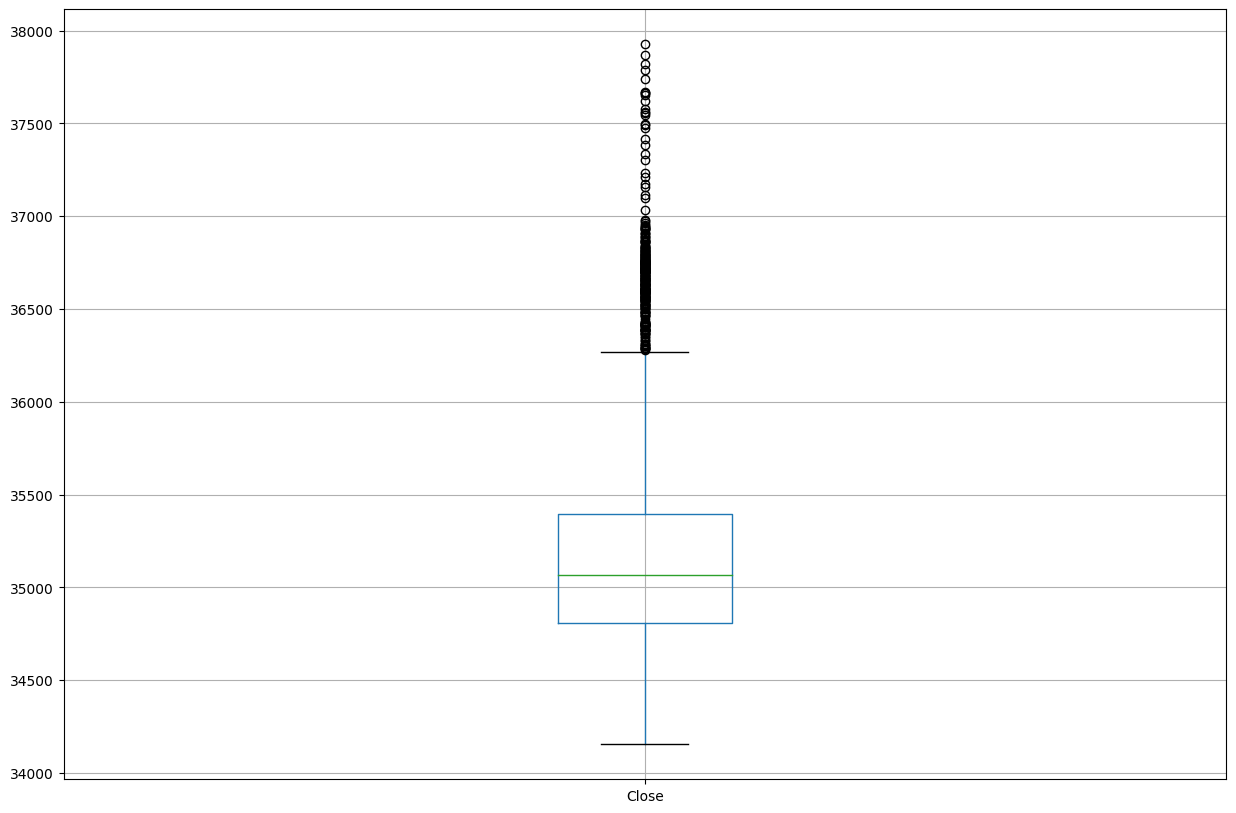

In [523]:
# Ahora vamos a identificar los outliers en la columna Close
df_bitcoin_clean.boxplot('Close')

In [524]:
# Para poder corregir estos outliers vamos a iteras por cada una de las
# columnas o atributos del Dataframe calculando sus estadisticos
close = df_bitcoin_clean['Close']
close_q1 = close.quantile(0.25).round(2)
close_q3 = close.quantile(0.75).round(2)
close_iiq = (close_q3 - close_q1).round(2)
close_low_lim = (close_q3 - 1.5 * close_iiq).round(2)
close_up_lim = (close_q3 + 1.5 * close_iiq).round(2)

In [525]:
# Una vez calculados los rangos intercuartiles vamos a revisarlos
print(f'Close Q1: {close_q1}')
print(f'Close Q3: {close_q3}')
print(f'Close IIQ: {close_iiq}')
print(f'Close Low Limit: {close_low_lim}')
print(f'Close Upper Limit: {close_up_lim}')

Close Q1: 34808.9
Close Q3: 35394.06
Close IIQ: 585.16
Close Low Limit: 34516.32
Close Upper Limit: 36271.8


In [526]:
# Dropear los valores que no se encuentren en el rango intercuartil
df_bitcoin_clean = df_bitcoin_clean[df_bitcoin_clean.Close.between(close_q1, close_q3)]

<Axes: >

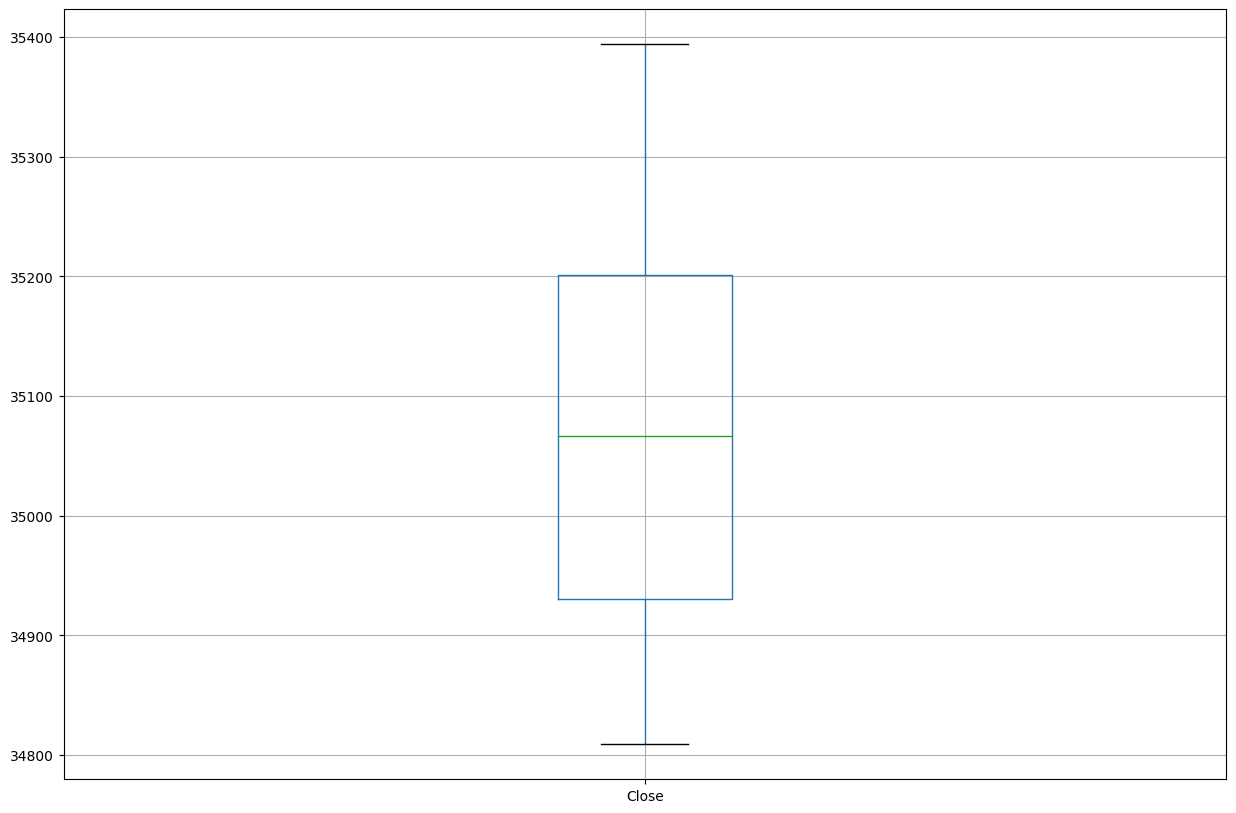

In [527]:
# Una vez dropeados vamos a volver a ver los graficos de caja
df_bitcoin_clean.boxplot('Close')

In [528]:
# Con los datos limpios vamos a recuperar el precio promedio del Bitcoin
mean_bitcoin_price = df_bitcoin_clean.Close.mean().round(4)

In [529]:
# Visualizamos el precio promedio del Bitcoin
print(f'{mean_bitcoin_price} USD')

35076.7706 USD


In [556]:
# Funcion para limpiar el Dataframe
def clean_bitcoin_database():
  df_bitcoin_clean = import_bitcoin_database()
  df_bitcoin_clean = df_bitcoin_clean[~df_bitcoin_clean.index.duplicated()]
  df_bitcoin_clean.Close.fillna(df_bitcoin_clean.Close.mean(), inplace = True)
  df_bitcoin_clean = df_bitcoin_clean[df_bitcoin_clean.Volume.ge(0)]
  close = df_bitcoin_clean['Close']
  close_q1 = close.quantile(0.25).round(2)
  close_q3 = close.quantile(0.75).round(2)
  df_bitcoin_clean = df_bitcoin_clean[df_bitcoin_clean.Close.between(close_q1, close_q3)]
  mean_bitcoin_price = df_bitcoin_clean.Close.mean().round(4)

## **4. Toma de Decisiones**

In [530]:
# Funcion que tome la decision de vender, esperar o comprar Bitcoins
def decision_making():
  if current_bitcoin_price >= mean_bitcoin_price and trend == 'Fall':
    return 'Sell'
  elif current_bitcoin_price < mean_bitcoin_price and trend == 'Rise':
    return 'Buy'
  else:
    return 'Wait'

In [531]:
# Llamamos a la funcion y guardamos su valor en 'decision_algorithm'
decision_algorithm = decision_making()
print(f'Decision: {decision_algorithm}')

Decision: Wait


## **5. Visualización**

In [532]:
# Agregar la columna con el precio promedio del Bitcoin al Dataframe
df_bitcoin['Average'] = mean_bitcoin_price

In [533]:
# Revisar los primeros registros del Dataframe
df_bitcoin.head(10)

,Open,High,Low,Close,Volume,Average
Datetime,,,,,,
2023-11-03 00:00:00+00:00,34942.472656,34942.472656,34883.429688,34883.429688,0,35076.7706
2023-11-03 00:05:00+00:00,34866.761719,34883.429688,34852.617188,34870.574219,0,35076.7706
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0,35076.7706
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0,35076.7706
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0,35076.7706
2023-11-03 00:25:00+00:00,34833.437500,34833.437500,34801.046875,34803.000000,0,35076.7706
2023-11-03 00:30:00+00:00,34789.164062,34789.164062,34770.187500,34770.187500,0,35076.7706
2023-11-03 00:35:00+00:00,34753.316406,34753.316406,34665.085938,34665.085938,11558912,35076.7706
2023-11-03 00:40:00+00:00,34713.839844,34731.152344,34713.839844,34731.152344,2750464,35076.7706


In [544]:
# Funcion para dibujar la evolucion del Bitcoin y la toma de decisiones
def bitcoin_evolution_diagram():
  plt.figure(figsize = (16,5))
  plt.plot(df_bitcoin.index, df_bitcoin['Close'])
  plt.plot(df_bitcoin.index, df_bitcoin['Average'])
  plt.xlabel('Seven Last Days')
  plt.ylabel('Bitcoin Price')
  plt.annotate(f'Decision: {decision_algorithm}', xy = (df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]), xytext = (-130, 110), textcoords = 'offset points', arrowprops = dict(arrowstyle = '->'), fontsize = 14, color = 'purple')
  plt.title('Robot Trading Challenge - Bitcoin Evolution Over Time')
  plt.show()

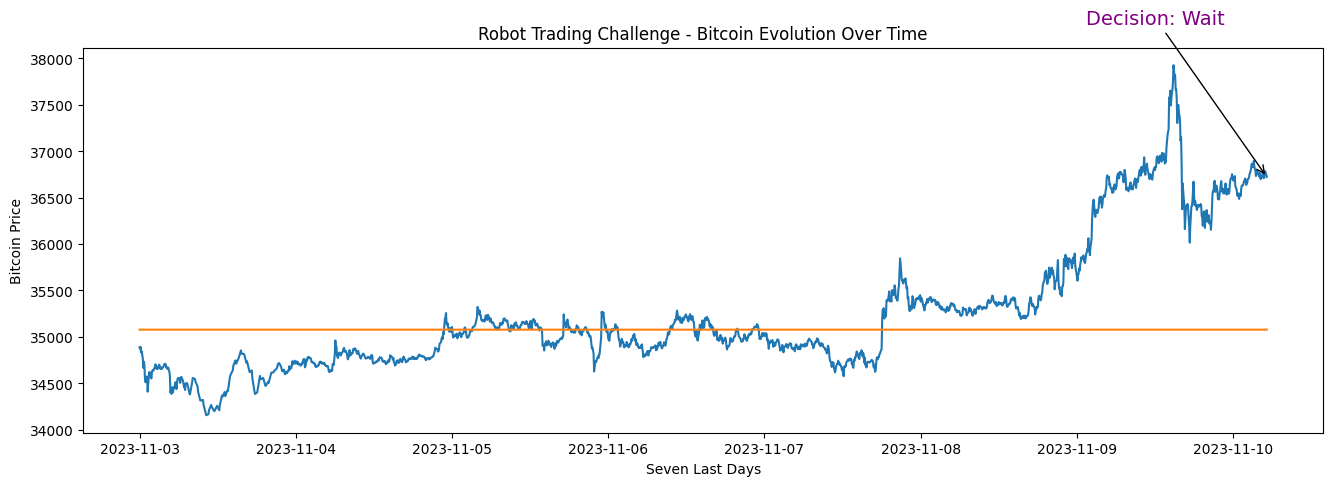

In [545]:
# Llamamos a la funcion para poder graficar la evolucion del Bitcoin
bitcoin_evolution_diagram()

## **6. Automatización**

In [547]:
from IPython.display import clear_output
import time

In [559]:
def automation():
  while(True):
    clear_output()
    import_bitcoin_database()
    get_bitcoin_trends()
    clean_bitcoin_database()
    decision_making()
    bitcoin_evolution_diagram()
    time.sleep(60)

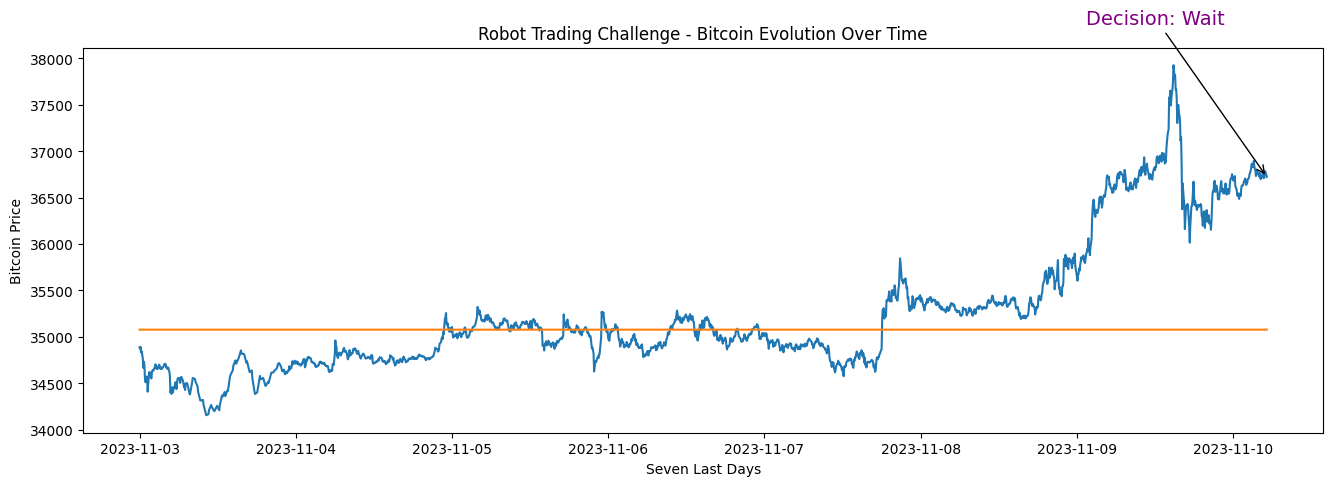

In [ ]:
automation()